# Grid Search to Find Optimal HyperparameterC 
# Use model = SVC()  to understand your model

ref: CASE STUDY (Linear SVM)

task: use more than 1 parameter

In [14]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [6]:
data=pd.read_csv("./Datasets/Pop_and_crime.csv")

data.head()

,Year,Population_Total,"Abandoning a child, child neglect and cruelty",Abduction of person under 16 years of age,Aggravated burglary,Aggravated sexual assault,Arson,"Assault causing harm, poisoning","Attempts/threats to murder, assaults, harassments and related offences",Blackmail or extortion,...,Social code offences (n.e.c.),Theft and related offences,Theft from person,Theft from shop,Theft/taking of vehicle and related offences,Threat to kill or cause serious harm,Trespass offences,Unseaworthy/dangerous use of boat or ship,Weapons and Explosives Offences,Total_Crime
0,2003,3979900.0,44.50,6.00,81.75,2.75,354.5,985.25,3384.00,5.25,...,299.00,18354.75,1665.50,3922.25,3286.50,10.50,359.75,0.00,478.50,114190.75
1,2004,4045200.0,47.75,3.00,70.50,3.50,375.0,972.25,3318.00,3.75,...,191.00,18047.25,1427.25,3720.25,3589.75,11.75,391.75,0.00,538.75,116177.50
2,2005,4133800.0,66.00,4.00,68.50,1.75,353.5,927.25,3420.75,4.50,...,269.00,18258.25,1152.50,4115.75,3546.75,23.75,460.00,0.00,638.25,126370.25
3,2006,4232900.0,75.00,3.00,71.25,4.00,415.0,1001.25,3889.50,2.75,...,204.50,18629.00,897.50,4608.75,3414.00,24.25,590.50,0.00,780.75,133717.25
4,2007,4375800.0,138.50,3.75,65.00,4.25,525.0,978.00,4534.75,5.25,...,187.25,18782.00,727.25,4692.00,3402.75,41.00,760.50,0.25,899.50,140990.00


In [3]:
#pop_and_crime_df.to_csv('popfull.csv', index=False)
X = data.iloc[:, 2:-1]  # Exclude Year and Total_Crime columns


In [13]:
columns = data.columns
for column in columns:
    skew = data[column].skew()
    if skew > 1  or skew < -1:
        print(column,skew)

Arson 1.3136709906627777
Assault causing harm, poisoning 1.230795575034443
Blackmail or extortion 2.4322681677192355
Carjacking, hijacking/unlawful seizure of aircraft/vessel 1.212288438016309
Dangerous driving causing serious bodily harm 1.2557453083033268
Dangerous or negligent acts 1.2189834682777987
Driving/in charge of a vehicle under the influence of drugs 1.4314477626054403
Driving/in charge of a vehicle while over legal alcohol limit 1.040102997682115
Endangerment with potential for serious harm/death 1.2588633404338085
Explosives, chemical weapons offences 1.8925495125228902
False alarm/interference with aircraft or air transport facilities 1.604959465430727
Fraud, deception and related offences 2.1812866673145996
Infanticide 2.97459721723007
Liquor licensing offences 1.3967238582711081
Other thefts, handling stolen property -1.0483978414440116
Sexual offence involving mentally impaired person 1.6917693331847612
Social code offences (n.e.c.) 1.1780027447776928
Theft and relate

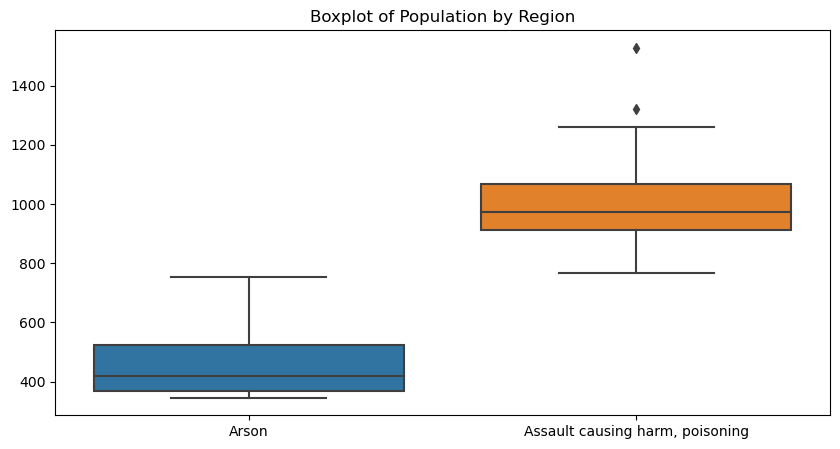

In [24]:

#sns.distplot(data['Arson'],hist=True);

import seaborn as sns 
# Get the columns names using: population_df.columns  and plot the boxplot with specific column

plt.figure(figsize=(10, 5)) # set the figure size
plt.title("Boxplot of Population by Region") # Add a title to the boxplot
sns.boxplot(data=data[['Arson', 'Assault causing harm, poisoning']])

# Show the plot
plt.show()
#3sns.bloxpot(data['Arson'])

In [4]:
#Standardize Data (Optional): Depending on the clustering algorithm you choose, it might be beneficial to standardize the data to have a mean of 0 and a standard deviation of 1.


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




    Choose a Clustering Algorithm: There are various clustering algorithms available, such as K-Means, DBSCAN, Hierarchical Clustering, etc. Choose an algorithm that fits your data and problem. For this example, let's use K-Means.

    Apply Clustering Algorithm: Use scikit-learn to apply the chosen clustering algorithm to your data.


In [5]:
X_scaled

array([[-1.18638021,  0.48851022,  1.11031015, ..., -1.75237035,
        -1.10980968, -1.47752086],
       [-1.0707907 , -0.94293832, -0.02278174, ..., -1.5656657 ,
        -1.10980968, -1.10220802],
       [-0.42171117, -0.46578881, -0.2242203 , ..., -1.1674597 ,
        -1.10980968, -0.48239677],
       ...,
       [-0.14607465,  1.681384  , -1.2314131 , ..., -0.56942138,
         0.58517238, -0.52444427],
       [-0.21720665,  2.15853351, -1.15587364, ..., -0.3418751 ,
         0.16142686, -0.37182743],
       [-0.47506017, -1.18151308, -0.67745706, ..., -0.2689436 ,
        -0.26231865, -0.48706871]])

In [6]:
from sklearn.cluster import KMeans

# Define the number of clusters (you can adjust this)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)  # Use X_scaled if you standardized the data
clusters

array([2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Add Cluster Labels to the DataFrame: 

In [7]:
data['Cluster'] = clusters

Explore the Clusters: You can now analyze the clusters, understand their characteristics, and draw insights from your data. Use various plotting libraries to visualize the results

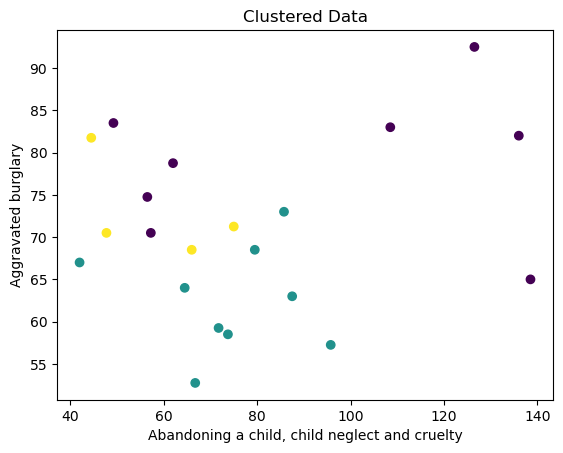

In [8]:
import matplotlib.pyplot as plt

# For example, you can create a scatter plot of two features with cluster labels
plt.scatter(data['Abandoning a child, child neglect and cruelty'], data['Aggravated burglary'], c=clusters, cmap='viridis')
plt.xlabel('Abandoning a child, child neglect and cruelty')
plt.ylabel('Aggravated burglary')
plt.title('Clustered Data')
plt.show()

# Regression
Regression Analysis:

    You can perform regression analysis to examine the relationship between the population and various crime rates. Multiple linear regression or polynomial regression models can help you determine how population size affects crime rates.

Performing a regression analysis to examine the relationship between population size and various crime rates is a common task in data analysis. You can use Python and libraries like pandas, numpy, and scikit-learn to perform linear or polynomial regression. Here's a step-by-step guide:

    Load and Prepare the Data:

    First, load your dataset using pandas. Ensure you have columns for population and the crime rates you want to analyze.

    


Select Relevant Columns:

Select the columns for population and the crime rates you want to analyze. In this example, let's consider "Population_Total," "Violent_Crime," and "Property_Crime" columns.



In [20]:

X = data['Population_Total'].values.reshape(-1, 1)  # Independent variable (population)
y = data['Importation of drugs'].values  # Dependent variable (violent crime rate)



Choose the Regression Model:

Depending on the relationship you expect between population and crime rates, you can choose between linear or polynomial regression. Here, we'll use simple linear regression as an example.


In [11]:

from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()



Split the Data (Optional):

You may want to split your data into training and testing sets to evaluate the model's performance. This step is optional but recommended for model evaluation.


In [12]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Train the Regression Model:

Fit the regression model to your training data.


In [13]:

model.fit(X_train, y_train)


LinearRegression()

Make Predictions:

Use the trained model to make predictions on your test data or the entire dataset.


In [14]:

y_pred = model.predict(X_test)  # Predictions on the test set


Evaluate the Model:

If you split your data, evaluate the model's performance using metrics such as mean squared error (MSE) and R-squared.


In [15]:

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 7.545900259874057
R-squared: -0.2650293813703364


A lower MSE and a higher R-squared indicate a better fit of the model to the data.

Visualize the Results:

You can visualize the regression line and the data points to better understand the relationship.


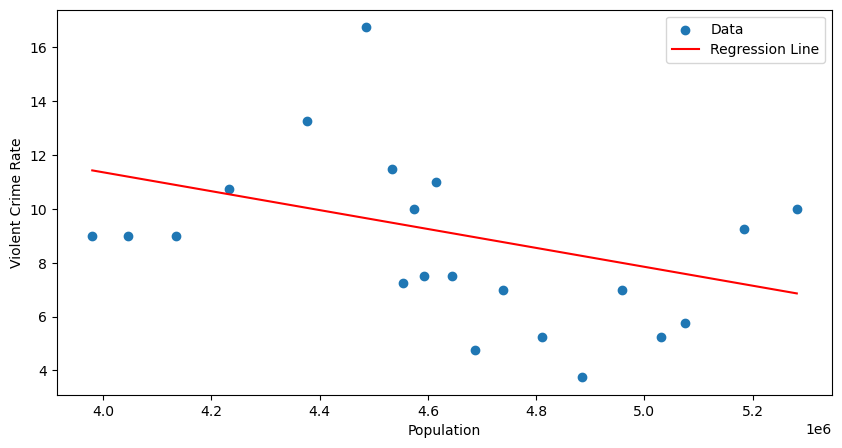

In [16]:

    import matplotlib.pyplot as plt

    
    plt.figure(figsize=(10, 5)) # set the figure size

    # Plot the data points
    plt.scatter(X, y, label='Data')

    # Plot the regression line
    plt.plot(X, model.predict(X), color='red', label='Regression Line')

    plt.xlabel('Population')
    plt.ylabel('Violent Crime Rate')
    plt.legend()
    plt.show()



# The linear regression in the image is rubbish. This is because the line is not straight and has a lot of noise.
The linear regression in the image is rubbish. This is because the line is not straight and has a lot of noise.

A linear regression model is a statistical model that attempts to model the relationship between two or more variables by fitting a linear equation to the data. The linear equation is then used to predict the value of one variable given the value of the other variable(s).

In order for a linear regression model to be useful, the relationship between the variables must be approximately linear. This means that the data points should be scattered along a straight line.

The image shows a scatter plot of population vs. violent crime rate. The data points are not scattered along a straight line, which indicates that the relationship between the two variables is not linear. Therefore, the linear regression model is not useful in this case.

In addition, the data points in the image are very noisy. This means that there is a lot of variation in the violent crime rate for a given population. This makes it difficult to identify any clear trend in the data.

Overall, the linear regression in the image is rubbish because it is not appropriate for the data and the data is too noisy.

Here are some tips for improving the linear regression model:

    Use a different type of regression model, such as a polynomial regression model or a non-linear regression model.
    Remove outliers from the data.
    Use a data transformation to make the relationship between the variables more linear.
    Collect more data to reduce the noise.



    Interpret the Results:

    Analyze the regression coefficients (slope and intercept) and the R-squared value to understand how population size affects the violent crime rate.

    Extension to Polynomial Regression (Optional):

    If you suspect that the relationship between population and crime rates is nonlinear, you can also perform polynomial regression using PolynomialFeatures from scikit-learn.


In [17]:

from sklearn.preprocessing import PolynomialFeatures

# Create a polynomial feature transformer (e.g., quadratic)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train the model on the polynomial features
model.fit(X_poly, y)


LinearRegression()


The steps for making predictions, evaluating the model, and visualizing the results are similar to simple linear regression.

Remember that regression analysis assumes a relationship between variables, but it does not establish causation. Make sure to interpret the results carefully and consider potential confounding factors that may affect the relationship between population and crime rates.

# Polynomial regression model:

Mean Squared Error: 14.278765996006774
R-squared: -1.3937579205375985


ValueError: X has 1 features, but LinearRegression is expecting 3 features as input.

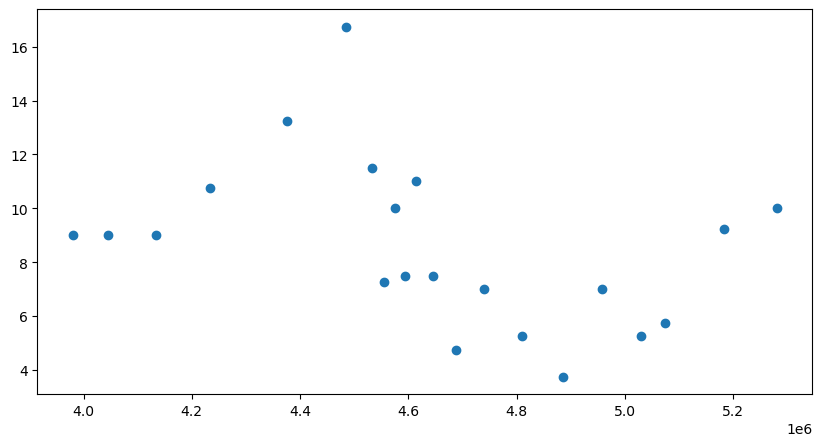

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Load the data
#data = np.loadtxt("./Datasets/Pop_and_crime.csv", delimiter=',')

# Split the data into independent and dependent variables
X = data['Population_Total'].values.reshape(-1, 1)
y = data['Importation of drugs'].values

# Create a polynomial features transformer
poly_features = PolynomialFeatures(degree=2)

# Transform the training data
X_train_poly = poly_features.fit_transform(X_train)

# Transform the test data
X_test_poly = poly_features.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the transformed training data
model.fit(X_train_poly, y_train)

# Make predictions on the transformed test data
y_pred_poly = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_poly)
r2 = r2_score(y_test, y_pred_poly)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the results
plt.figure(figsize=(10, 5))

# Plot the data points
plt.scatter(X, y, label='Data')

# Plot the regression line
plt.plot(X, model.predict(X), color='red', label='Regression Line')

# Plot the polynomial regression line
plt.plot(X_test, y_pred_poly, color='blue', label='Polynomial Regression Line')

plt.xlabel('Population')
plt.ylabel('Importation of drugs')
plt.legend()
plt.show()